# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


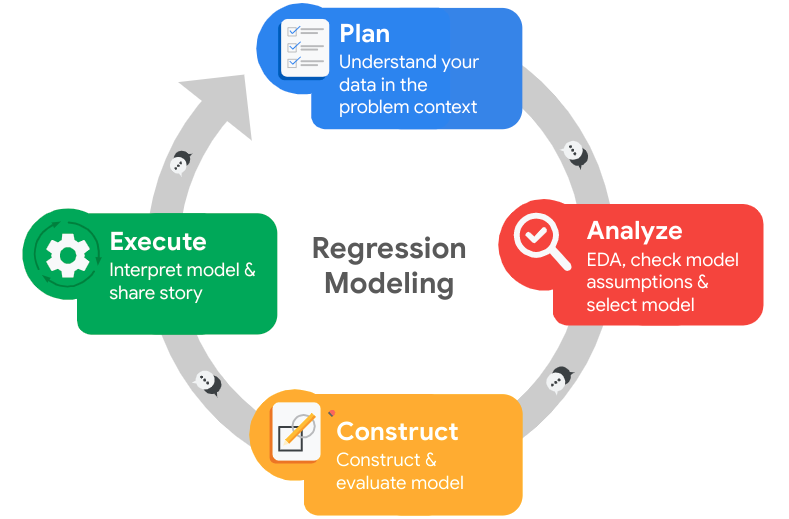

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [126]:
# Import packages
#Data Manipulation
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

#Data Modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#For metrics and other helpful functions
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

#For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_comma_sep.csv`.** 

In [128]:
# Load dataset into a dataframe

df0 = pd.read_csv("HR_comma_sep.csv")


# Display first few rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [131]:
# Gather basic information about the data

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [133]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [136]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [137]:
# Rename columns as needed
df0.rename(columns = {'average_montly_hours':'average_monthly_hours',
                     'time_spend_company':'tenure',
                     'Work_accident':'work_accident',
                     'Department':'department'}, inplace = True)


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [140]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [143]:
# Check for duplicates
df0.duplicated().sum()

3008

There are 3008 rows that contain duplicates.

In [145]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


We can perform a likelihood test by applying the Bayes' theorem to check the if the values are duplicated or it is just by chance. This is highly unlikely so we are going to drop the duplicated columns

In [147]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep = 'first')


# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

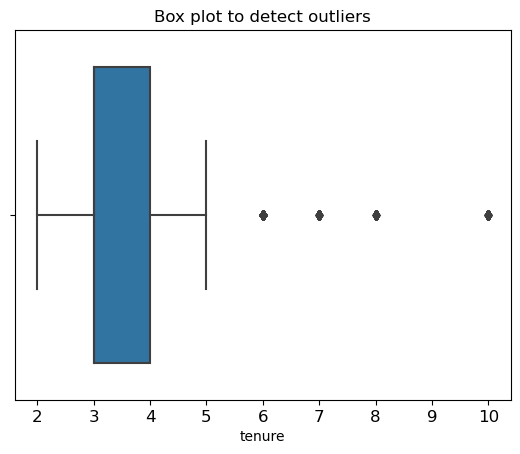

In [150]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.title('Box plot to detect outliers')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.boxplot(x = df1['tenure'])
plt.show()

The box plot shows that there are outliers in the data. Now we wil check how many rows would be considered outliers

In [152]:
# Determine the number of rows containing outliers

percen25 = df1['tenure'].quantile(0.25)
percen75 = df1['tenure'].quantile(0.75)

IQR = percen75 - percen25

upper_limit = percen75 + (1.5*IQR)
lower_limit = percen25 - (1.5*IQR)

outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

print('Number of rows with outliers: {}'.format(len(outliers)))

Number of rows with outliers: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [158]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize = True))


left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

We can start by creating a stacked boxplots showing `average_monthly_hours` distributions for `number_project`, comapring the distribution of employees that stayed verses those who left.

Box plots are deceptively difficult to comprehend without context, so we could plot a stacked histogram to visualise the distribution of `number_project` for those who stayes and those who left.

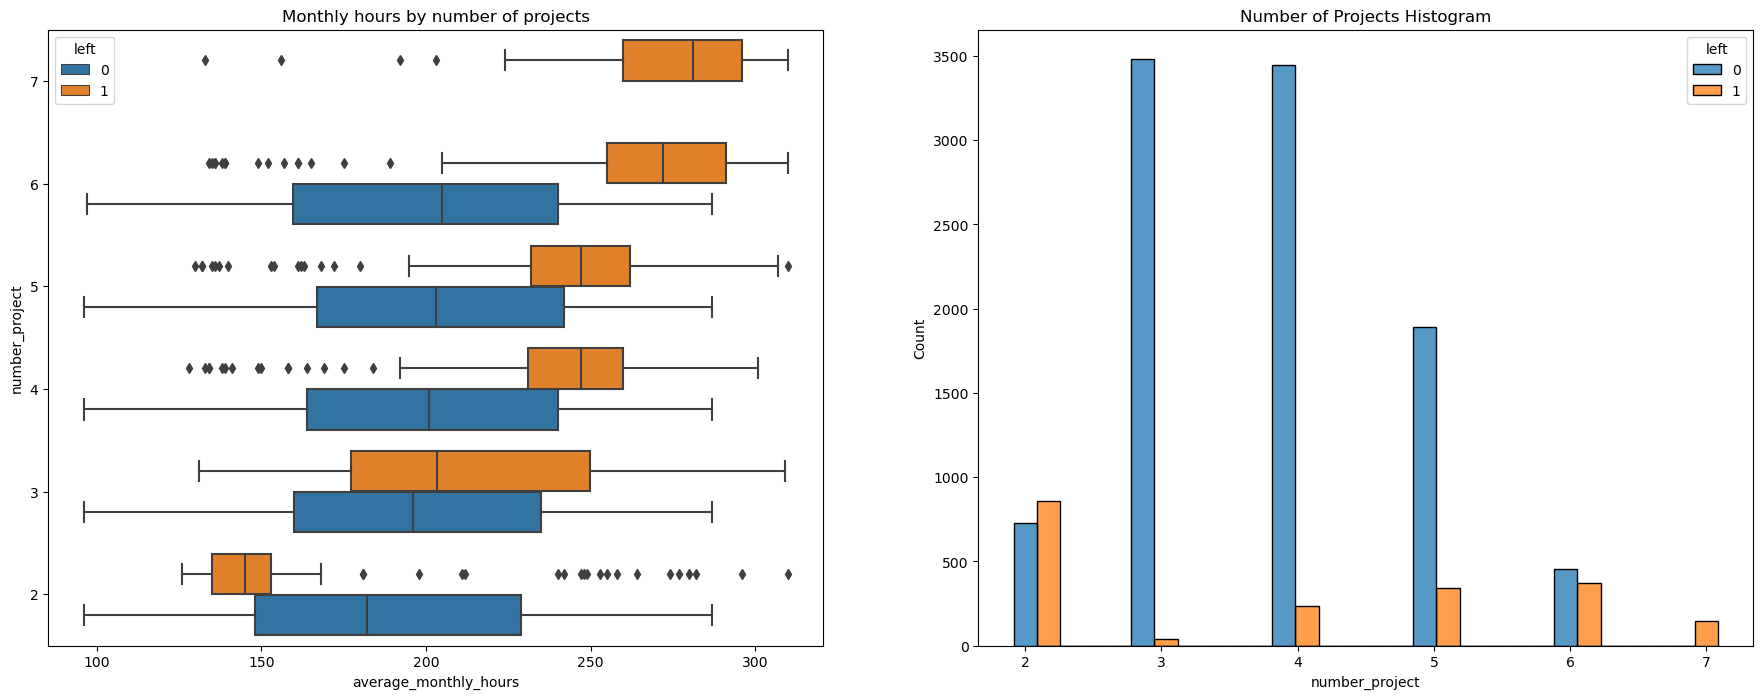

In [162]:
#Set figure and axes plots
fig, ax = plt.subplots(1, 2, figsize = (22, 8))

#Create a boxplot showing 'average_monthly_hours' distribution for 'number_projects' comparing employees who stayed
sns.boxplot(data = df1, x = 'average_monthly_hours', y = 'number_project', hue = 'left', orient = 'h', ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects')

#Create histogram showing distribution of 'number_projects', comparing employees who stayed versus those who left
tenure_stay = df1[df1['left'] == 0]['number_project']
tenure_left = df1[df1['left'] == 1]['number_project']
sns.histplot(data = df1, x = 'number_project', hue = 'left', multiple = 'dodge', shrink = 2, ax = ax[1])
ax[1].set_title('Number of Projects Histogram')

#Display the plots
plt.show()

It might be natural that people working on more projects would also work long hours. That appears to be the case here, with the mean hours for each group (stayed and left) increasing with the number of projects worked.

There are a few things that stand out from the plot:

- There are two groups of employees that left the company. (A) those who worked considerably less than their peers with the same number of projects and (B) those who worked much more than their peers. Of those groups, group (A) was probably fired. It may also be the case that these emplyees have submitted their notice and have been assigned fewer hours as they are already out the door. Group (B) is likely to have quit.
- Everybody who worked on 7 projects left to company and the those who left working on 6 projects worked for approximately `255 - 295 hours per month` - much more than the others.
- The optimal number of projects to work on would be 3-4. The ratio of emplyoees who stayed versus left is very small for these cohorts.
- Assuming they are working for 40 hours each week for 5 days. The average working hours per month would be `166.67 hours per month`. Otherthan than those working on 2 projects, every group in the company seems to be overworked

In [164]:
# We confirm everyone who worked on 7 projects left
df1[df1['number_project'] == 7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

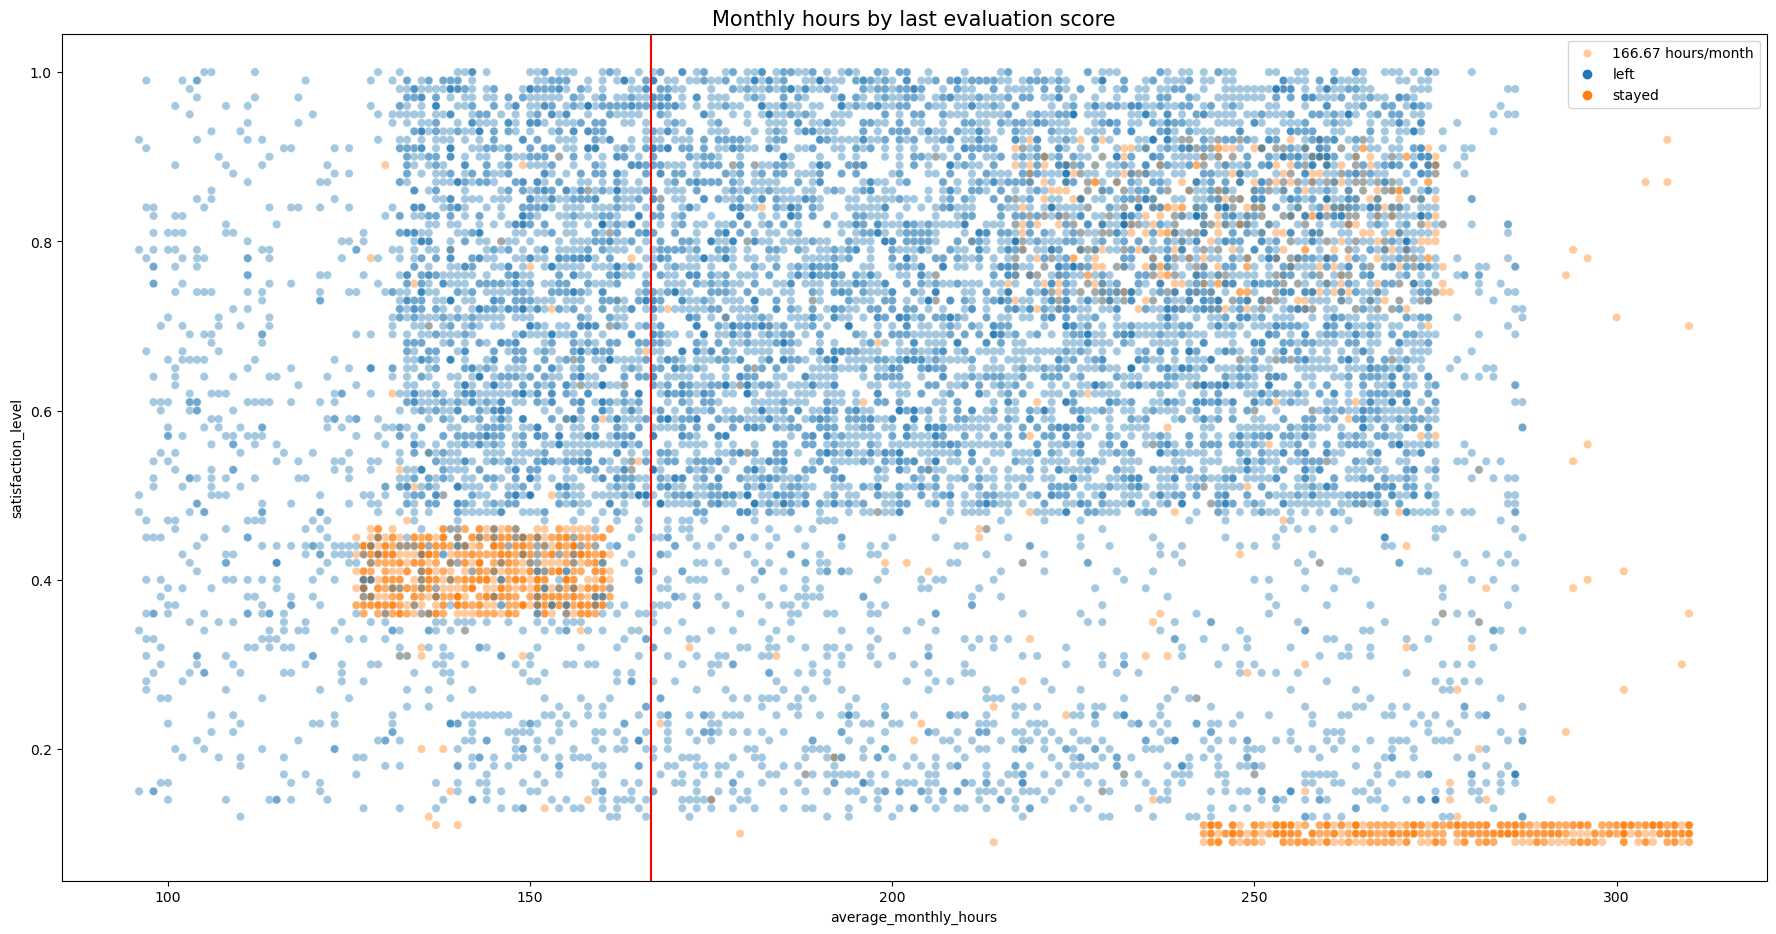

In [165]:
#Here we will explore the relationship between average_monthly_hours and satisfaction levels

plt.figure(figsize = (22, 11))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left', alpha = 0.4)
plt.axvline(x = 166.67, label = 'Average working hours (166.67)', color = 'red')
plt.legend(labels = ['166.67 hours/month', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize = '15')
plt.show()

The scatter plot shows 3 groups that left the company:
- The first group appears to have worked long hours `(~ 240 - 310 hours/month)` and their satisfaction levels were close to 0. The long hours approximately 75 hours per week, was likely related to the low satisfaction levels.
- The next group that left the company worked normal working hours (less than general average) but had a low satisfaction levels. Probably they felt pressured to work more and the pressures of the role lowered their satisfaction levels of `(~0.4)`.
- The last group worked for `(~ 210-280 hours)` and had satisfaction levels ranging from `~0.7-0.9`.

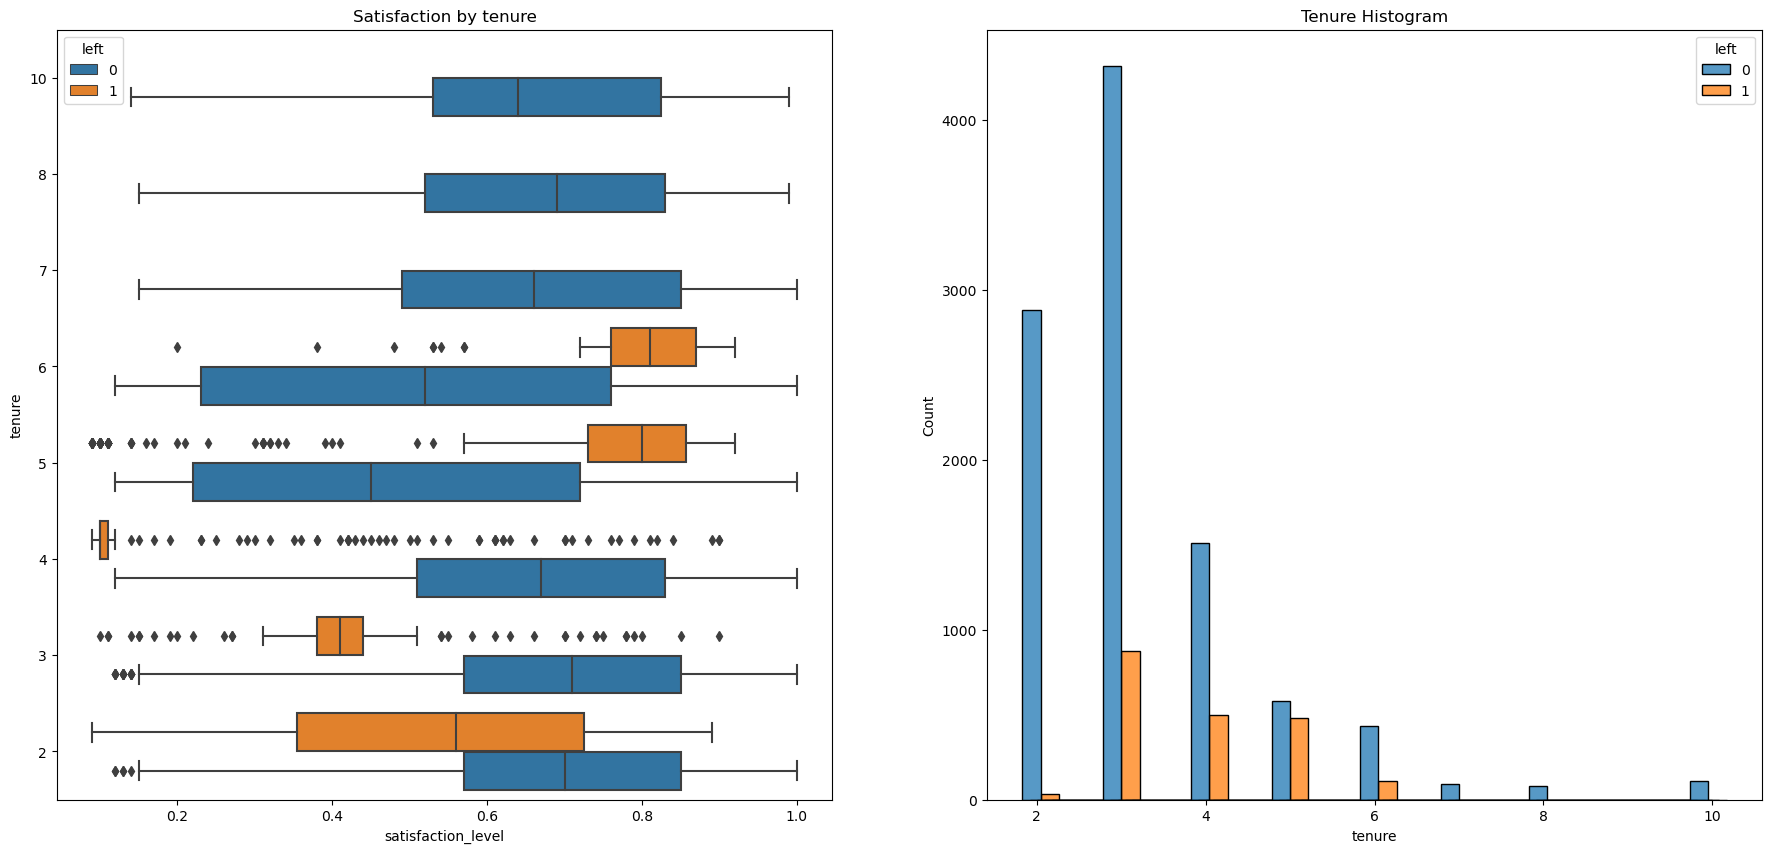

In [167]:
# In this plot we will explore the realtionshhip between tenure and satisfaction levels

fig, ax = plt.subplots(1, 2, figsize = (22, 10))

#Box plot showing distribution of satisfaction levels for different tenures
sns.boxplot(data = df1, x = 'satisfaction_level', y = 'tenure', hue = 'left', orient = 'h', ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure')

#Histogram showing distribution of tenure, comparing employees who stayed versus those who left
sns.histplot(data = df1, x = 'tenure', hue = 'left', multiple = 'dodge', shrink = 5, ax = ax[1])
ax[1].set_title('Tenure Histogram')

plt.show()

There are many observations to make from this plot:

- Employees who left fall into two groups, dissatisfied employees with shorter terms and very satisfied employees with medium-length tenures.
- Employees who left at the 4 year mark had extremely low satisfaction levels. This is worth investigate to the reasons behind this.It might be due to some policy changes at the 4 year mark.
- The longest tenured emplyees did not leave, their satisfaction levels are aligned with newer employees that just started
- The histogram shows relatively few longer-tenured employees. They are probably higher-paid, higher-ranking employees.

In [169]:
df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction levels of employees who left are lower than those who stayed. 
Interestingly, among those who stayed, the mean satisfcation score is lower than the median, this indicated that the satisfaction levels among those who stayes is skewed to the left

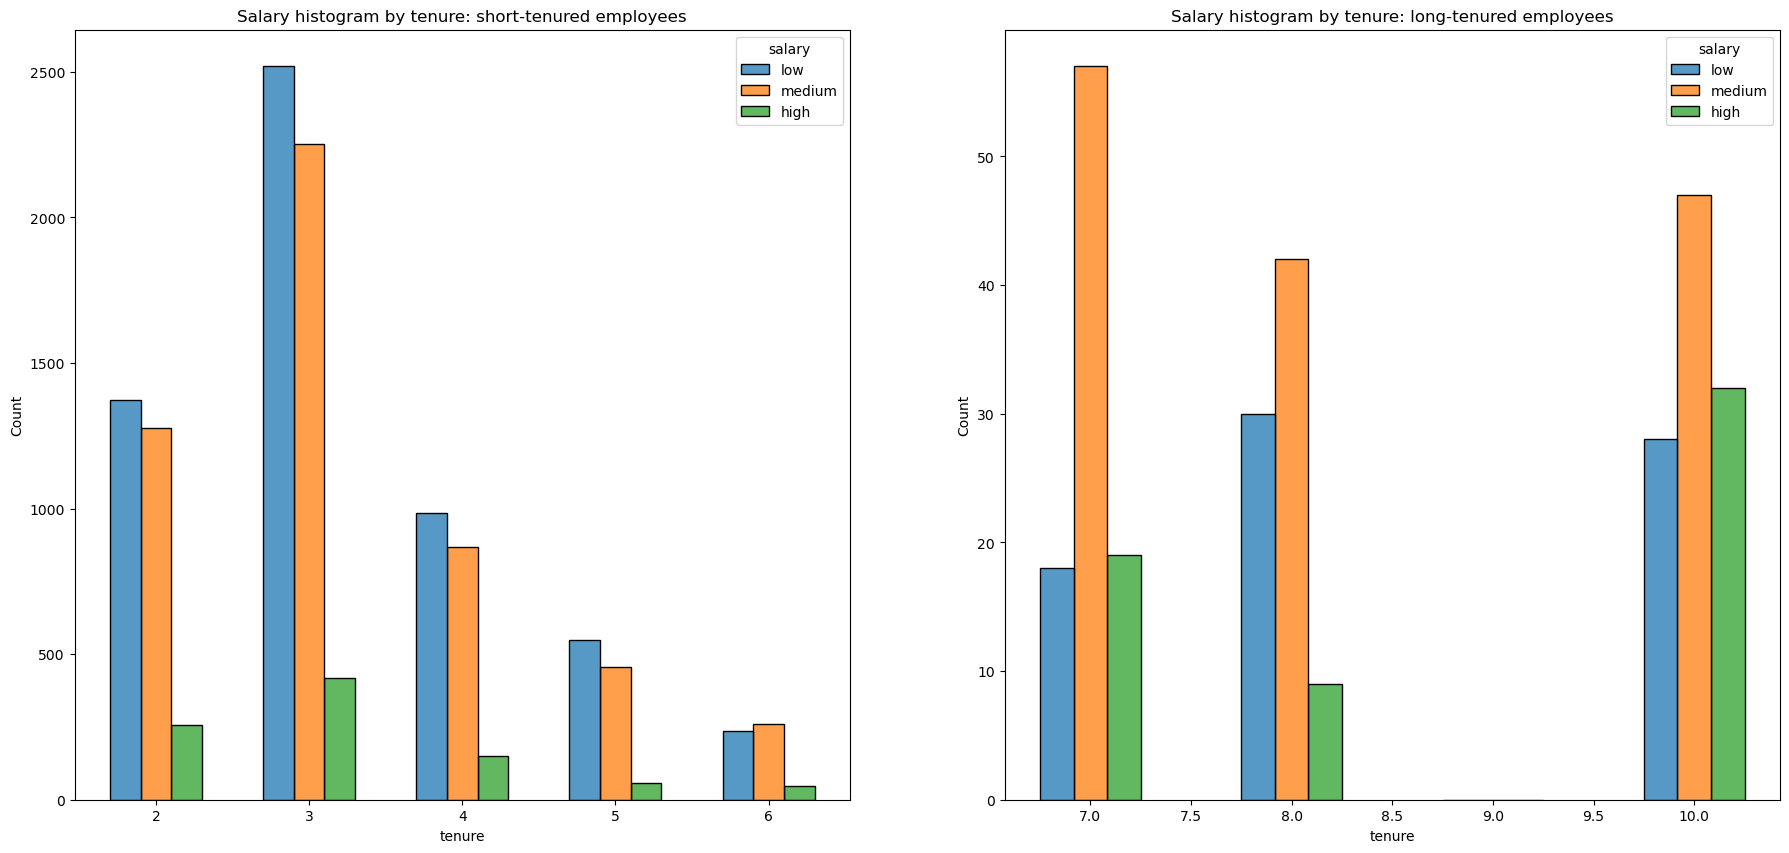

In [171]:
#Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22, 10))

#Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

#Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

#Plot both graphs
sns.histplot(data = tenure_short, x = 'tenure', hue = 'salary', discrete = 1,
            hue_order = ['low', 'medium', 'high'], multiple = 'dodge', shrink = 0.6 ,ax = ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured employees')

sns.histplot(data = tenure_long, x = 'tenure', hue = 'salary', discrete = 1,
            hue_order = ['low', 'medium', 'high'], multiple = 'dodge', shrink = 0.5, ax = ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured employees')

#Show Plots
plt.show()

The plot shows that that long-tenured employees does not comprise of only higher-paid employees

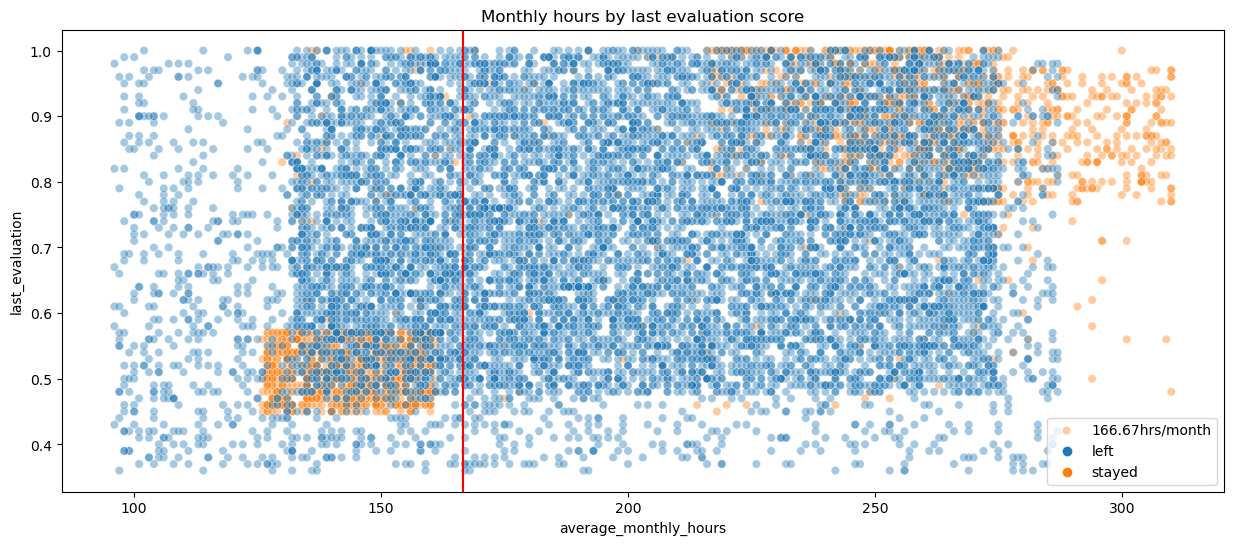

In [173]:
#We will explore the correlation between month_average_hours and 'last evaluation'

plt.figure(figsize = (15, 6))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'last_evaluation', hue = 'left', alpha = 0.4)
plt.axvline(x = 166.67, color = 'red', label = '166.67 hrs/month')
plt.legend(labels = ['166.67hrs/month', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score')
plt.show()

The following observations can be made from the above plot:
- The scatter plot shows two groups of employees who left, one that worked long hours and performed very well, and those who worked less than the nominal monthly average and received lower evaluation scores.
- There seems to be a correlation between average working hours and evaluation scores.
- There isn't a high perentage of employees in the upper left quadrant of the plot, but working long hours does not guarntee a high evaluation score.
- Most of the employees work well over the nominal average.

Text(0.5, 1.0, 'Monthly hours by promotion last 5 years')

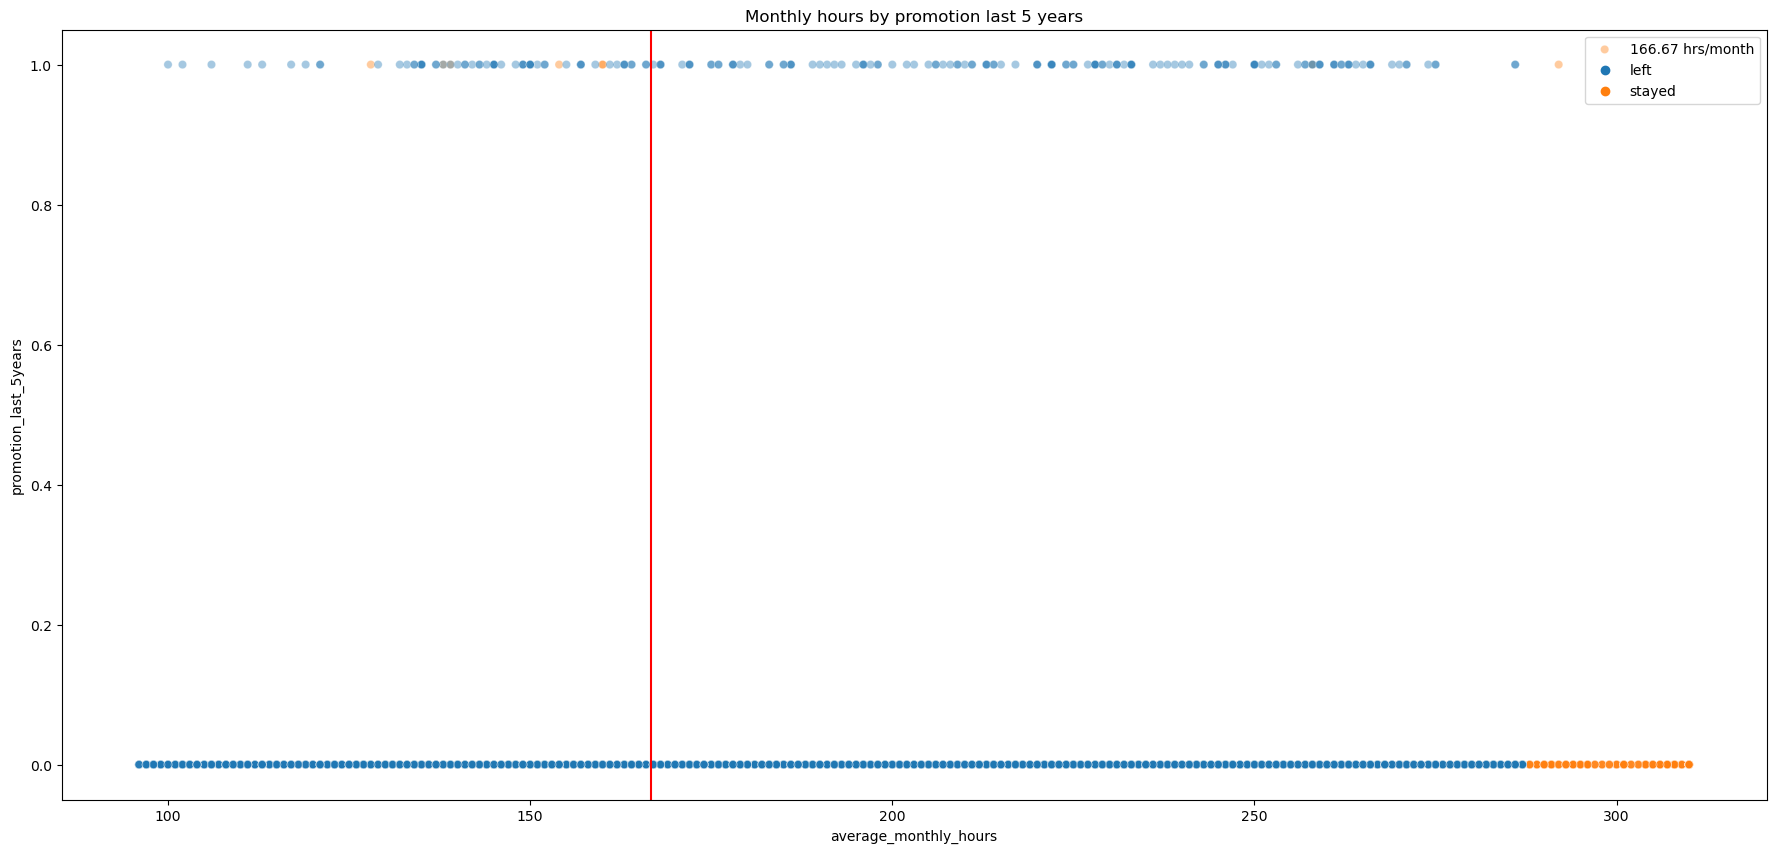

In [175]:
#Examine whether employees working long hours were promoted in the last 5 years

plt.figure(figsize = (22, 10))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'promotion_last_5years', hue = 'left', alpha = 0.4)
plt.axvline(x = 166.67, color = 'red', label = '166.67 hrs/month')
plt.legend(labels = ['166.67 hrs/month', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years')

The plot above shows:
- Very few employees received a promotion in the last 5 years/
- very few employees who worked the most hours were promoted in the last 5 years.
- Most of the employees that left were working long hours.

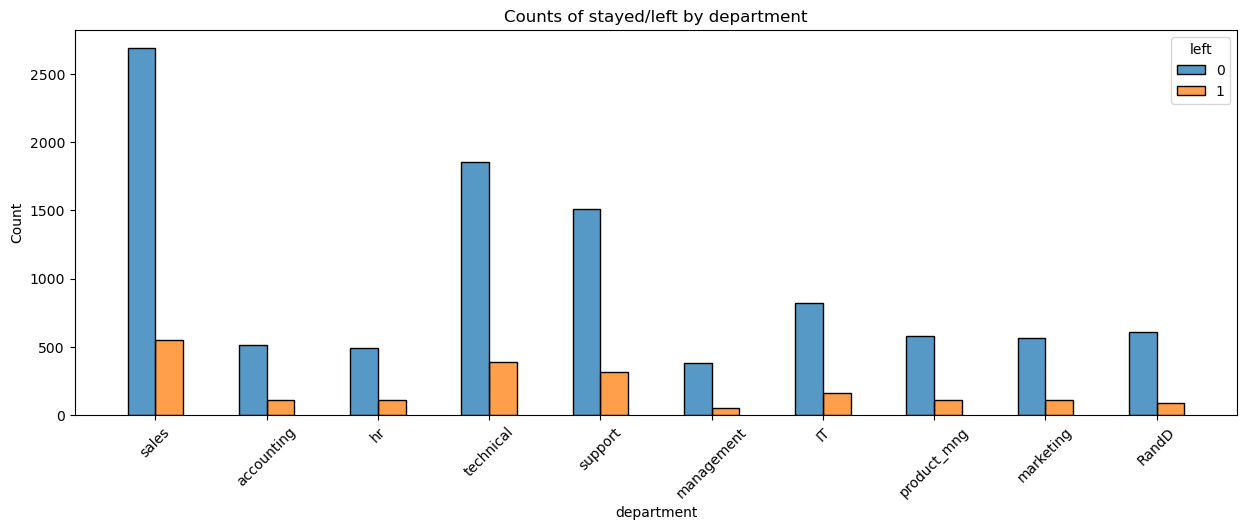

In [196]:
#Examine the relationship between Department and Employees who stayed or left

plt.figure(figsize = (15, 5))
sns.histplot(data = df1, x = 'department', hue = 'left', discrete = 1,
            hue_order = [0, 1], multiple = 'dodge', shrink = 0.5)
plt.xticks(rotation = 45)
plt.title('Counts of stayed/left by department')
plt.show()

There doesn't seem to be any department that differs significantly in its proportion of those who left to those who stayed

Text(0.5, 1.0, 'Correlation Heatmap')

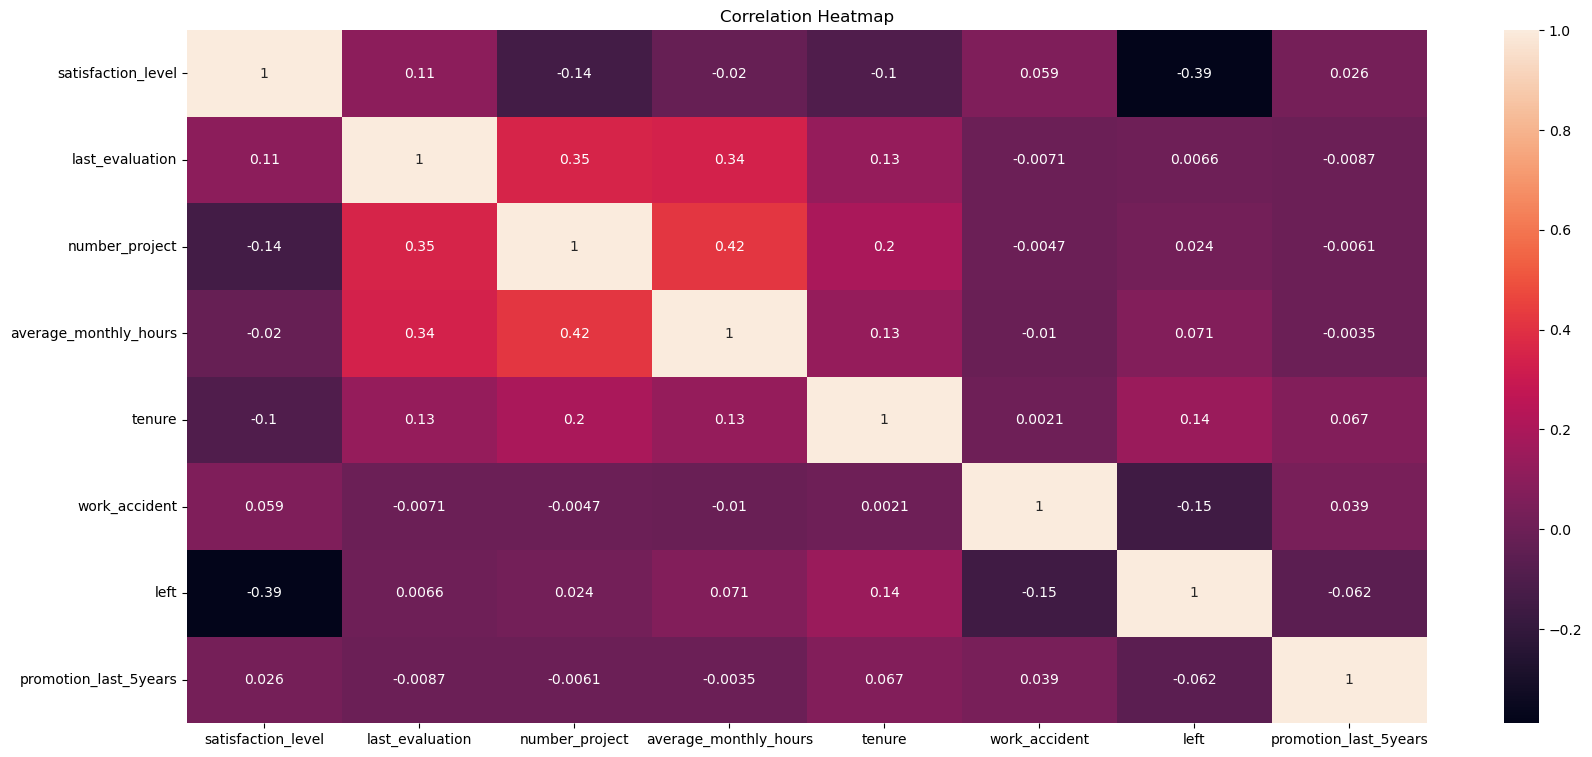

In [203]:
#Create a correlation heat map to find strong correlations between variables in the data.

plt.figure(figsize = (20, 9))
heatmap = sns.heatmap(df0[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 
                          'tenure', 'work_accident', 'left', 'promotion_last_5years']].corr(), vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap')

The heatmap confirms our initial assumption that evaluation scores have some positive correlation with number of projects and average monthly hours worked.

### Insights

Based on the EDA, we can conclude that employees are leaving because of long working hours, many projects and generally low satisfaction levels. It is ungratifying to work for long hours and not receive that promotion of a good evaluation score.

Also it was seen that if an employee has spent 6 years at the company, there are less likely to leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling Approach A: Logistic Regression

We are using the binomial logistic regression for this task.

Before splitting the data, we have to encode non-numeric variables.

We should also remove outliers as they can affect the model resutls.

In [205]:
df_encode = df1.copy()

#Encode salary colunn as an ordinal numeric category
df_encode['salary'] = (df_encode['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes)

#Create dummy variables for the department column
df_encode = pd.get_dummies(df_encode, drop_first = False)

df_encode.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


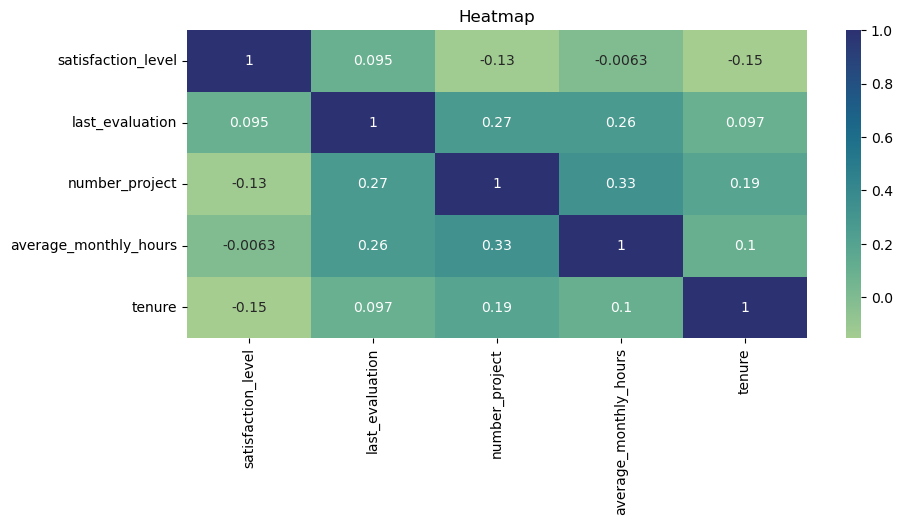

In [207]:
#Create a heatmap to visualize how correlated variables are
plt.figure(figsize = (10, 4))
sns.heatmap(df_encode[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours','tenure']].corr(),
           annot = True, cmap = 'crest')
plt.title('Heatmap')
plt.show()

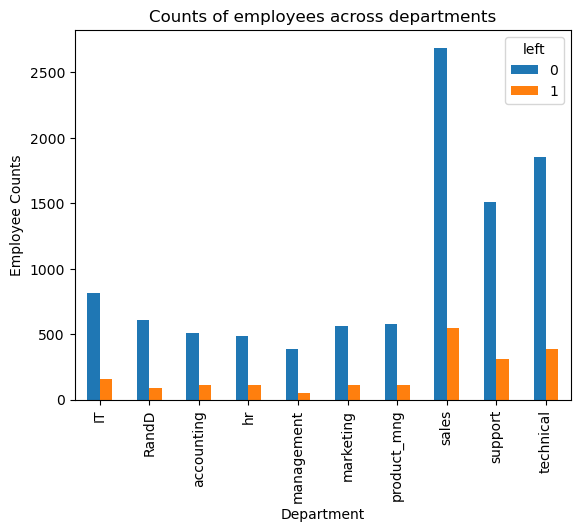

In [209]:
# Create a stacked bart plot to visualize number of employees across department, 
#comparing those who left with those who didn't

pd.crosstab(df1['department'], df1['left']).plot(kind = 'bar')
plt.title('Counts of employees across departments')
plt.ylabel('Employee Counts')
plt.xlabel('Department')
plt.show()

In [211]:
#Removing outliers for this model as the logistic regression models is sensitive to outliers
df_logreg = df_encode[(df_encode['tenure'] >= lower_limit) & (df_encode['tenure'] <= upper_limit)]

df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [213]:
#Isolate the target variable
y = df_logreg['left']

#Create a dataset of only independent variables
X = df_logreg.drop('left', axis = 1)

In [215]:
#Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24, stratify = y)

In [217]:
#Create a logistic regression object
log_clf = LogisticRegression(random_state = 24, max_iter = 700)

#Fit the regression model
log_clf.fit(X_train, y_train)

#Using the trained model to make predictions for the test set
y_pred = log_clf.predict(X_test)

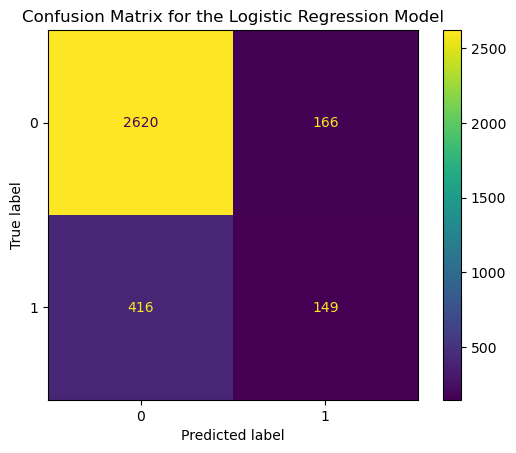

In [219]:
#Compute the confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels = log_clf.classes_)

#Display confusion matrix
log_disp = ConfusionMatrixDisplay(log_cm, display_labels = log_clf.classes_)
log_disp.plot(values_format = '')

#Display plot
plt.title('Confusion Matrix for the Logistic Regression Model')
plt.show()

The upper left quadrant represents the True Negatives, upper right represents the False Negatives, lower left represents the False Positives and lower right represents the True Positives.

- True Negatives: The number of people that did not leave the company that the model correctly classified.
- True Positives: The number of people that did leave the company that the model correctly classified.
- False Negatives: The number of people that did not leave the company that the model wrongly classifed.
- False Positives: The number of people that did leave the comapny that the model wrongly classified.

A perfect model would not have any False postives or false negatives.

In [222]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names = target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      2786
    Predicted would leave       0.47      0.26      0.34       565

                 accuracy                           0.83      3351
                macro avg       0.67      0.60      0.62      3351
             weighted avg       0.80      0.83      0.81      3351



The classification report shows the model achieved a precision of 80% and a recall of 83%. The F1 score is 0.81 and accuracy is 83%. However, if its more important to predict employees who leave, then the scores are significantly lower.

### Modeling Approach B: Tree-based model

In this approach we implement a decision tree model and a random forest model.

In [226]:
#Isolate the target variable
y = df_encode['left']

#Create a dataset of independent variables
X = df_encode.drop('left', axis = 1)

In [228]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 24)

In [234]:
# Decision Tree Model 1
#Instantiate the model
tree = DecisionTreeClassifier(random_state = 24)

#Create a hyperparameter dictionary
cv_params = {'max_depth':[3, 5, 9, None],
            'min_samples_leaf':[2, 5, 1],
            'min_samples_split':[2, 4, 6]
            }

#scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

#Instantiate Gridsearch
tree1 = GridSearchCV(tree, cv_params, scoring = scoring, cv = 5, refit = 'roc_auc')

#Fit the model
tree1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'max_depth': [3, 5, 9, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [236]:
#Check best parameters
tree1.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [238]:
#Check for AUC score
tree1.best_score_

0.9672863821610418

This is a strong AUC score, showing the model can predict employees who will leave very well.

In [240]:
#Function to extract scores from the Grid Search
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what the model should be called in the output
    model_object: a fit GridSearch object
    metric (string): precision, recall, f1, or auc
    
    Returns:
    A pandas Data Frame with F1, recall, precision, accuracy and auc of the model with the best mean 'metric' score
    across all validation folds.
    '''
    
    #Create a dictionary that maps the input metric to the actual metric name in the GridSearch object
    metric_dict = {'auc':'mean_test_roc_auc',
                  'precision':'mean_test_precision',
                  'recall':'mean_test_recall',
                  'f1':'mean_test_f1',
                  'accuracy':'mean_test_accuracy'}
    
    #Get all results from the CV and put them into a dataframe
    cv_results = pd.DataFrame(model_object.cv_results_)

    #Isolate the row with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    #Extract the required scores
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    precision = best_estimator_results.mean_test_precision
    recall = best_estimator_results.mean_test_recall
    accuracy = best_estimator_results.mean_test_accuracy
    
    #Create a table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model':[model_name],
                         'precision':[precision],
                         'recall':[recall],
                         'F1':[f1],
                         'accuracy':[accuracy],
                         'auc':[auc]})

    return table

In [242]:
#Get CV scores for the Decision tree
tree1_cv_results = make_results('Decision Tree 1', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree 1,0.948475,0.911054,0.929366,0.977005,0.967286


All these scores indicate that the decision tree model has good predictive power on the dataset.

In [247]:
#Random Forest Model 1

rf = RandomForestClassifier(random_state = 24)

#Create a hyperparameter dictionary
cv_params = {'max_depth':[3, 5, None],
            'max_features':[1.0],
            'max_samples':[0.7, 1.0],
            'min_samples_leaf':[1, 2, 3],
            'min_samples_split':[2, 3, 4],
            'n_estimators':[300, 500]}

#Scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

#Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring = scoring, refit = 'roc_auc', cv = 4)

#Fit the GridSearch
rf1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=24),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [249]:
#Functions to write and read picke files
path = ''
def write_pickle(path, model_object, save_as:str):
    '''
    Input:
    path: the file path were the pickle file should be saved.
    model_object: The model that needs to be pickled.
    save_as: Name the pickle file should be saved as
    
    Output: A call to pickle the model in the folder indicated.
    '''
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)
    
    return

def read_pickle(path, saved_model_name:str):
    '''
    Input:
    path: Path to the folder where you want to read from.
    saved_model_name: Name of the pickle file
    
    Output:
    model: The model saved in the pickle file
    '''
    
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
    
    return model

In [251]:
#write pickle
write_pickle(path, rf1, 'hr_rf1')

#Read Pickle
rf1 = read_pickle(path, 'hr_rf1')

In [253]:
rf1.best_score_ #AUC-ROC

0.9792420120779763

In [255]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [257]:
#Get all CV scores
rf1_cv_results = make_results('Random Forest CV', rf1, 'auc')
print(rf1_cv_results)
print(tree1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  Random Forest CV   0.950111  0.903151  0.926014  0.976051  0.979242
             model  precision    recall        F1  accuracy       auc
0  Decision Tree 1   0.948475  0.911054  0.929366  0.977005  0.967286


In [259]:
#Define a function that gets all the scores froma model's predictions.

def get_scores(model_name:str, model, X_test, y_test):
    '''
    Input:
    model_name: The name of the model to show in the results
    model: the model object to evaluate
    X_test: The test data
    y_test: The y_test data
    
    Output:
    A pandas dataframe of the metric scores for the model
    '''
    preds = model.best_estimator_.predict(X_test)
    
    auc = roc_auc_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    
    table = pd.DataFrame({'model':[model_name],
                         'precision':[precision],
                         'recall':[recall],
                         'accuracy':[accuracy],
                         'f1':[f1],
                         'AUC':[auc]
                         })
    return table

In [261]:
rf1_test_scores = get_scores('Random Forest CV', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,accuracy,f1,AUC
0,Random Forest CV,0.946644,0.921273,0.978321,0.933786,0.955472


The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, you can be more confident that your model's performance on this data is representative of how it will perform on new, unseeen data.

#### Feature Engineering

Since the scores of the model are high, there is a chance of data leakage. Data leakage is when you use data to train a model that should not be used during training, either because it should appear in the test set or that you'd never expect that data when the model is deployed. 

In this case, the comapny would not have satisfaction levels reported for all its employees. Its also possible that the average_monthly_hours column is a source of data leakage. If an employee has already decided to leave or has already been identified by management to be fired, they may have fewer working hours.

In the first round, we used all the features to train the model. In this round, we will use feature enginnering to imporve model performance.

We can drop `satisfaction_level` and create a new label called `Overworked`. This will be a binary variable

In [263]:
df2 = df_encode.drop('satisfaction_level', axis = 1)
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [265]:
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


166.67 is the nominal average for someone who works 50 weeks per year, 5 days per week, 8 hours per day.

We can define overworked as someone who works more than 175 hours per month on average.

In [268]:
df2['overworked'] = (df2['overworked'] > 175).astype(int)
df2 = df2.drop('average_monthly_hours', axis = 1)

df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
1,0.86,5,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
2,0.88,7,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
3,0.87,5,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,1
4,0.52,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0


In [270]:
#Isolate independent and target variables
y = df2['left']

X = df2.drop('left', axis = 1)

In [272]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 24)

In [276]:
#Decision Tree Model 2

tree = DecisionTreeClassifier(random_state = 24)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

#Fit the model
tree2.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [278]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [280]:
# Check best AUC score on CV
tree2.best_score_

0.9582457599174206

In [282]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

             model  precision    recall        F1  accuracy       auc
0  Decision Tree 1   0.948475  0.911054  0.929366  0.977005  0.967286
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.820498  0.893489  0.852804  0.948516  0.958246


In [286]:
#Random Forest Model 2

rf = RandomForestClassifier(random_state = 24)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

#Fit the data
rf2.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=24),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [289]:
#write pickle
write_pickle(path, rf2, 'hr_rf2')

In [291]:
#read pickle
rf2 = read_pickle(path, 'hr_rf2')

In [293]:
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [295]:
rf2.best_score_

0.9659744849536207

In [297]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.820498  0.893489  0.852804  0.948516  0.958246
               model  precision    recall        F1  accuracy       auc
0  random forest2 cv   0.865633  0.896179  0.880228  0.959412  0.965974


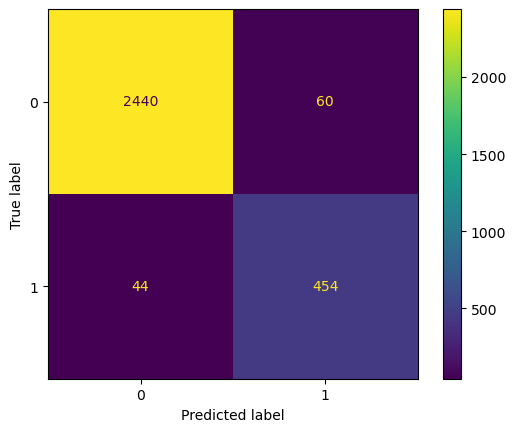

In [299]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

For exploratory purpose, you might want to inspect the splits of the decision tree model and the most important features in the random forest model.

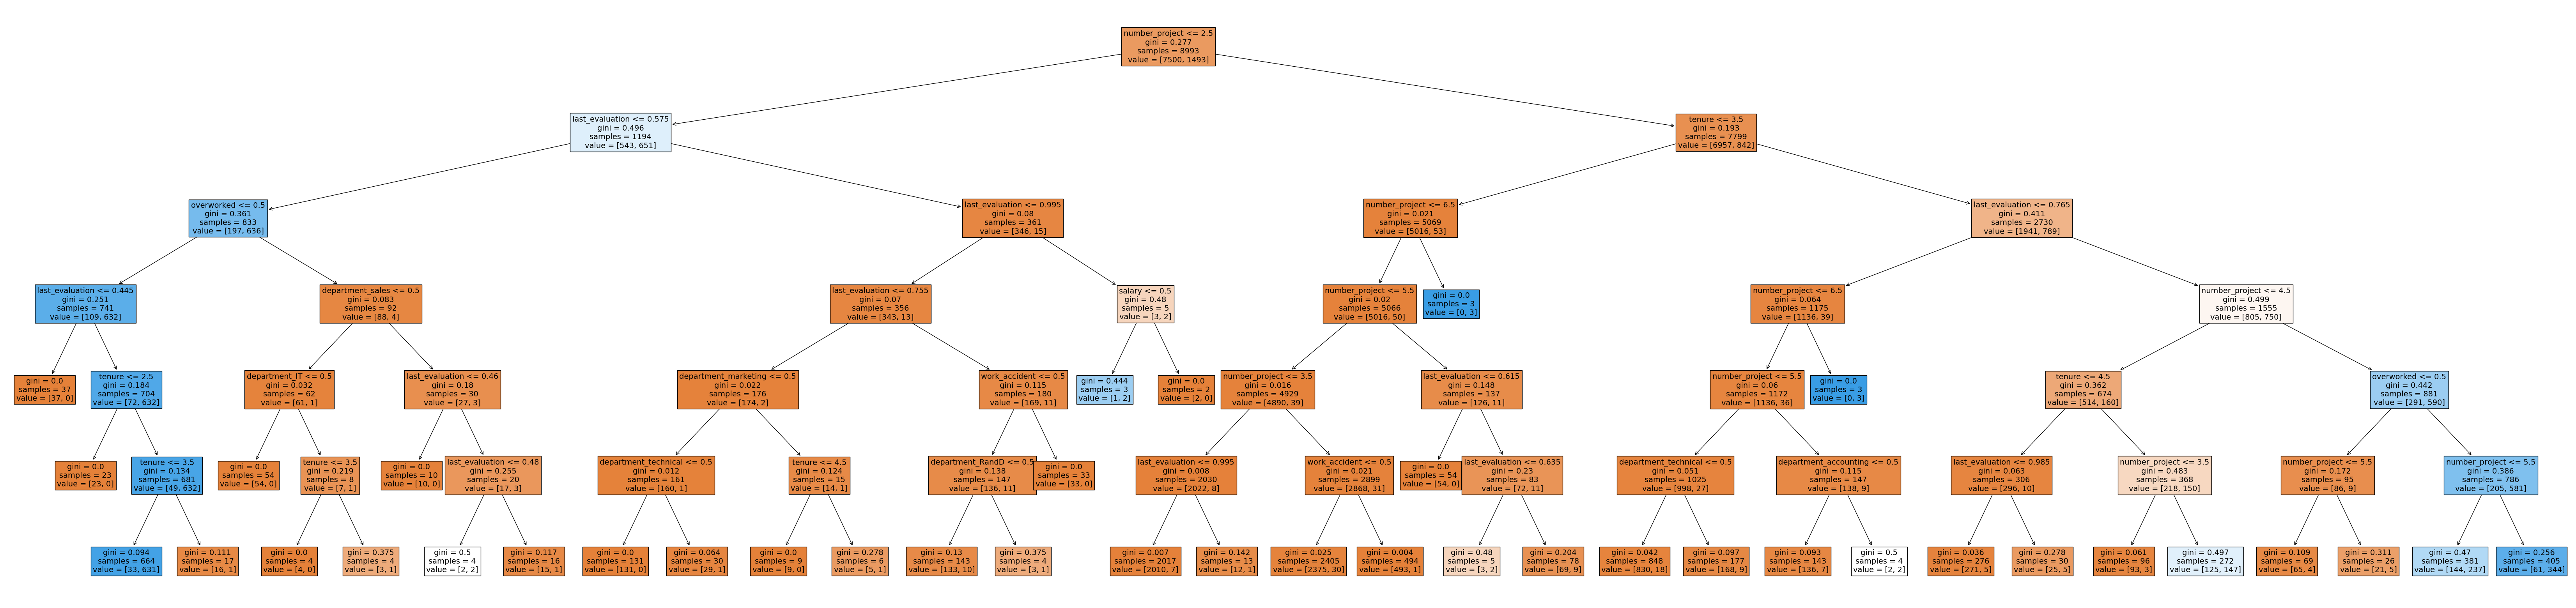

In [306]:
# Decision Tree Plot
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=list(X.columns), filled=True);
plt.show()

In [308]:
#Feature Importances based on the Decision Tree

tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
number_project,0.343579
last_evaluation,0.335654
tenure,0.218308
overworked,0.100089
department_accounting,0.000892
salary,0.000601
work_accident,0.000220
department_technical,0.000175
department_sales,0.000160
department_RandD,0.000142


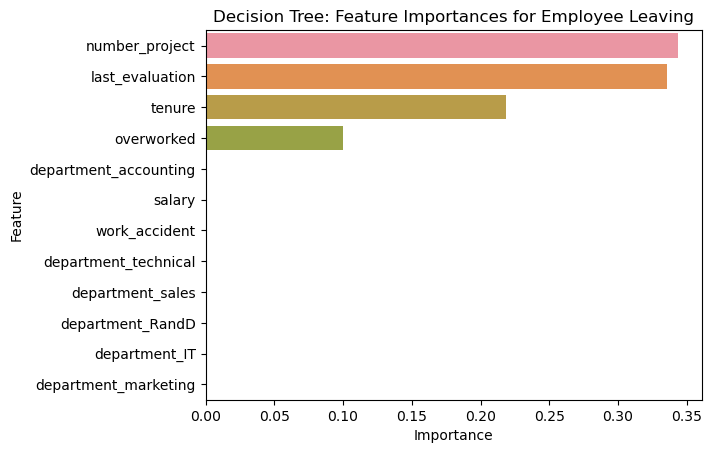

In [310]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

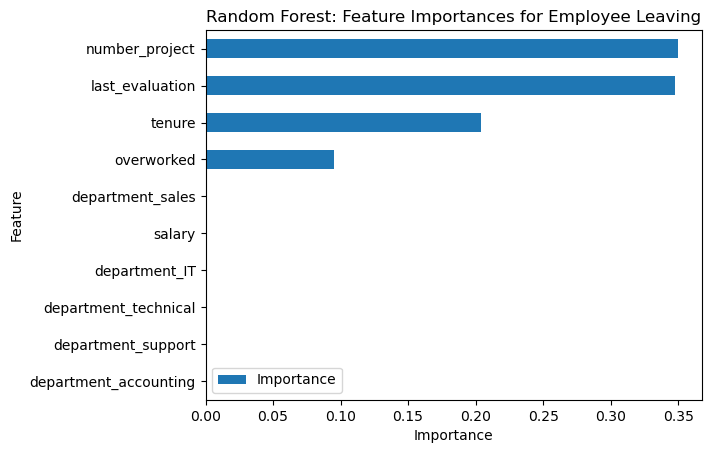

In [312]:
#Random Forest feature importances

feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left, and they are the same as the ones used by the decision tree model.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 81% (all weighted averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 95.8%, precision of 82.0%, recall of 89.3%, f1-score of 85.2%, and accuracy of 94.85%, on the test set. The random forest modestly outperformed the decision tree model. 

### Conclusion, Recommendations, Next Steps

The models and feature importances extracted from the models confirms that the employees are being overworked.

To retain employees, the following recommendations could be presented to the stakeholders:
- Cap the number of projects that employees can work on,
- Consider promoting employees that have been with the company for 4 years or further investigate why employees are dissatisfied at the 4-year mark.
- Either reward employees for working long hours or do not require them to do so.
- High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.

#### Next Steps
- It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when last_evaluation is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score.

- For another project, you could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.